## The contents include:

* 1. Retrieving a sequence
* 2. Reading and writing the FASTA file
* 3. Getting the detail of a sequence composition

## 1. Retrieving a sequence

Before we do sequence analysis, the first thing we need is a sequence of DNA or protein. We can retrieve such sequence data either by visiting the database hosting page via a browser or by accessing the data mart form within R via corresponding commands/functions.

In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
install.packages("BiocManager")
BiocManager::install("seqinr")

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'seqinr'

also installing the dependencies 'ade4', 'segmented'




package 'ade4' successfully unpacked and MD5 sums checked
package 'segmented' successfully unpacked and MD5 sums checked
package 'seqinr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpAn8cHh\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'



In [15]:
library(seqinr)

In [16]:
choosebank()

 [1] "genbankseqinr"   "genbank"         "embl"            "emblwgs"        
 [5] "swissprot"       "ensembl"         "hogenom7dna"     "hogenom7"       
 [9] "hogenom"         "hogenomdna"      "hovergendna"     "hovergen"       
[13] "hogenom5"        "hogenom5dna"     "hogenom4"        "hogenom4dna"    
[17] "homolens"        "homolensdna"     "hobacnucl"       "hobacprot"      
[21] "phever2"         "phever2dna"      "refseq"          "refseq16s"      
[25] "greviews"        "bacterial"       "archaeal"        "protozoan"      
[29] "ensprotists"     "ensfungi"        "ensmetazoa"      "ensplants"      
[33] "ensemblbacteria" "mito"            "polymorphix"     "emglib"         
[37] "refseqViruses"   "ribodb"          "taxodb"         

In [17]:
choosebank("genbank")

In [18]:
q1 <- query("BRCA1", "SP=Homo sapiens AND K=BRCA1")  ## try to use in R 3.3
q1

582 SQ for SP=Homo sapiens AND K=BRCA1

In [19]:
attributes(q1)
# Have a look at the returned value of the `query` command by looking at the various components of the object

$names
[1] "call"     "name"     "nelem"    "typelist" "req"      "socket"  

$class
[1] "qaw"

In [20]:
q1$req
# To check the set of all of the sequences that were retrieved, choose the category and get the name, length, and 
# other attributes for every available sequence in the query

[[1]]
            name           length            frame           ncbicg 
"AB621825.BRCA1"             "71"              "0"              "1" 

[[2]]
            name           length            frame           ncbicg 
"AF005068.BRCA1"           "5379"              "0"              "1" 

[[3]]
            name           length            frame           ncbicg 
"AF284812.BRCA1"             "84"              "0"              "1" 

[[4]]
            name           length            frame           ncbicg 
"AF507076.BRCA1"             "84"              "0"              "1" 

[[5]]
            name           length            frame           ncbicg 
"AF507077.BRCA1"             "84"              "0"              "1" 

[[6]]
            name           length            frame           ncbicg 
"AF507078.BRCA1"             "84"              "0"              "1" 

[[7]]
            name           length            frame           ncbicg 
"AY093484.BRCA1"             "46"              "1"     

In [21]:
q2 <- query("BRCA1", "SP=Homo sapiens AND AC=U61268")
q2
# To fetch a specific sequence by its accession number, use the `AC` attribute in the `query` command

1 SQ for SP=Homo sapiens AND AC=U61268

In [22]:
myseq <- getSequence(q2$req[[1]])
myseq
# To fetch a specific sequence from the `query` object, use the `getsequence` command

[1] "t" "c" "g" "c" "t" "a" "g" "a" "a" "c" "c" "c" "g" "g" "g" "a" "g" "g"
  [19] "c" "g" "g" "a" "g" "g" "t" "t" "g" "c" "a" "g" "t" "g" "a" "g" "c" "c"
  [37] "g" "a" "g" "a" "t" "c" "g" "c" "g" "c" "c" "a" "t" "t" "g" "c" "a" "c"
  [55] "t" "c" "c" "a" "g" "c" "c" "t" "g" "g" "g" "c" "g" "a" "c" "a" "g" "a"
  [73] "g" "c" "g" "a" "g" "a" "c" "t" "g" "t" "c" "t" "c" "a" "a" "a" "a" "c"
  [91] "a" "a" "a" "a" "c" "a" "a" "a" "a" "c" "a" "a" "a" "a" "c" "a" "a" "a"
 [109] "a" "c" "a" "a" "a" "a" "a" "a" "c" "a" "c" "c" "g" "g" "c" "t" "g" "g"
 [127] "t" "a" "t" "g" "t" "a" "t" "g" "a" "g" "a" "g" "g" "a" "t" "g" "g" "g"
 [145] "a" "c" "c" "t" "t" "g" "t" "g" "g" "a" "a" "g" "a" "a" "g" "a" "g" "g"
 [163] "t" "g" "c" "c" "a" "g" "g" "a" "a" "t" "a" "t" "g" "t" "c" "t" "g" "g"
 [181] "g" "a" "a" "g" "g" "g" "g" "a" "g" "g" "a" "g" "a" "c" "a" "g" "g" "a"
 [199] "t" "t" "t" "t" "g" "t" "g" "g" "g" "a" "g" "g" "g" "a" "g" "a" "a" "c"
 [217] "t" "t" "a" "a" "g" "a" "a" "c" "t" "g" "g" "a" "t" "c" "c" "a" "t" "t"
 [235] "t" "g" "c" "g" "c" "c" "a" "t" "t" "g" "a" "g" "a" "a" "a" "g" "c" "g"
 [253] "c" "a" "a" "g" "a" "g" "g" "g" "a" "a" "g" "t" "a" "g" "a" "g" "g" "a"
 [271] "g" "c" "g" "t" "c" "a" "g" "t" "a" "g" "t" "a" "a" "c" "a" "g" "a" "t"
 [289] "g" "c" "t" "g" "c" "c" "g" "g" "c" "a" "g" "g" "g" "a" "t" "g" "t" "g"
 [307] "c" "t" "t" "g" "a" "g" "g" "a" "g" "g" "a" "t" "c" "c" "a" "g" "a" "g"
 [325] "a" "t" "g" "a" "g" "a" "g" "c" "a" "g" "g" "t" "c" "a" "c" "t" "g" "g"
 [343] "g" "a" "a" "a" "g" "g" "t" "t" "a" "g" "g" "g" "g" "c" "g" "g" "g" "g"
 [361] "a" "g" "g" "c" "c" "t" "t" "g" "a" "t" "t" "g" "g" "t" "g" "t" "t" "g"
 [379] "g" "t" "t" "t" "g" "g" "t" "c" "g" "t" "t" "g" "t" "t" "g" "a" "t" "t"
 [397] "t" "t" "g" "g" "t" "t" "t" "t" "a" "t" "g" "c" "a" "a" "g" "a" "a" "a"
 [415] "a" "a" "g" "a" "a" "a" "a" "c" "a" "a" "c" "c" "a" "g" "a" "a" "a" "c"
 [433] "a" "t" "t" "g" "g" "a" "g" "a" "a" "a" "g" "c" "t" "a" "a" "g" "g" "c"
 [451] "t" "a" "c" "c" "a" "c" "c" "a" "c" "m" "t" "a" "c" "c" "c" "g" "g" "t"
 [469] "c" "a" "g" "t" "c" "a" "c" "t" "c" "c" "t" "c" "t" "g" "t" "a" "g" "c"
 [487] "t" "t" "t" "c" "t" "c" "t" "t" "t" "c" "t" "t" "g" "g" "a" "g" "a" "a"
 [505] "a" "g" "g" "a" "a" "a" "a" "g" "a" "c" "c" "c" "a" "a" "g" "g" "g" "g"
 [523] "t" "t" "g" "g" "c" "a" "g" "c" "g" "a" "t" "a" "t" "g" "t" "g" "a" "a"
 [541] "a" "a" "a" "a" "t" "t" "c" "a" "g" "a" "a" "t" "t" "t" "a" "t" "g" "t"
 [559] "t" "g" "t" "c" "t" "a" "a" "t" "t" "a" "c" "a" "a" "a" "a" "a" "g" "c"
 [577] "a" "a" "c" "t" "t" "c" "t" "a" "g" "a" "a" "t" "c" "t" "t" "t" "a" "a"
 [595] "a" "a" "a" "t" "a" "a" "a" "g" "g" "a" "c" "g" "t" "t" "g" "t" "c" "a"
 [613] "t" "t" "a" "g" "t" "t" "c" "t" "t" "t" "g" "g" "t" "t" "t" "g" "t" "a"
 [631] "t" "c" "a" "t" "t" "c" "t" "a" "a" "a" "a" "c" "c" "t" "t" "c" "c" "a"
 [649] "a" "a" "t" "c" "t" "t" "a" "a" "a" "t" "t" "t" "a" "c" "t" "t" "t" "a"
 [667] "t" "t" "t" "t" "a" "a" "a" "a" "t" "g" "a" "t" "a" "a" "a" "a" "t" "g"
 [685] "a" "a" "g" "t" "t" "g" "t" "c" "a" "t" "t" "t" "t" "a" "t" "a" "a" "a"
 [703] "c" "c" "t" "t" "t" "t" "a" "a" "a" "a" "a" "g" "a" "t" "a" "t" "a" "t"
 [721] "a" "t" "a" "t" "a" "t" "g" "t" "t" "t" "t" "t" "c" "t" "a" "a" "t" "g"
 [739] "t" "g" "t" "t" "a" "a" "a" "g" "t" "t" "c" "a" "t" "t" "g" "g" "a" "a"
 [757] "c" "a" "g" "a" "a" "a" "g" "a" "a" "a" "t" "g" "g" "a" "t" "t" "t" "a"
 [775] "t" "c" "t" "g" "c" "t" "c" "t" "t" "c" "g" "c" "g" "t" "t" "g" "a" "a"
 [793] "g" "a" "a" "g" "t" "a" "c" "a" "a" "a" "a" "t" "g" "t" "c" "a" "t" "t"
 [811] "a" "a" "t" "g" "c" "t" "a" "t" "g" "c" "a" "g" "a" "a" "a" "a" "t" "c"
 [829] "t" "t" "a" "g" "a" "g" "t" "g" "t" "c" "c" "c" "a" "t" "c" "t" "g" "g"
 [847] "t" "a" "a" "g" "t" "c" "a" "g" "c" "a" "c" "a" "a" "g" "a" "g" "t" "g"
 [865] "t" "a" "t" "t" "a" "a" "t" "t" "t" "g" "g" "g" "a" "t" "t" "c" "c" "t"
 [883] "a" "t" "g" "a" "t" "t" "a" "t" "c" "t" "c" "c" "t" "a" "t" "g" "c" "a"
 [901] "a" "a" "t" "g" "a" "a" "c" "a" "g" "a" "a" "t

In [23]:
annots <- getAnnot(q2$req[[1]])
annots
# fetch the annotation (the other attributes of a sequence) 

[1] "LOCUS       HSU61268                1338 bp    DNA     linear   PRI 16-JAN-1997"
 [2] "DEFINITION  Human breast and ovarian cancer susceptibility (BRCA1) gene, exon"  
 [3] "            2, partial flanking introns, and partial cds."                      
 [4] "ACCESSION   U61268"                                                             
 [5] "VERSION     U61268.1"                                                           
 [6] "KEYWORDS    ."                                                                  
 [7] "SOURCE      Homo sapiens (human)"                                               
 [8] "  ORGANISM  Homo sapiens"                                                       
 [9] "            Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;"  
[10] "            Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini;"       
[11] "            Catarrhini; Hominidae; Homo."                                       
[12] "REFERENCE   1  (bases 1 to 1338)"                                               
[13] "  AUTHORS   Struewing,J.P., Robbins,C. and Brody,L.C."                          
[14] "  TITLE     BRCA1: genomic sequence flanking exon 2"                            
[15] "  JOURNAL   Unpublished"                                                        
[16] "REFERENCE   2  (bases 1 to 1338)"                                               
[17] "  AUTHORS   Struewing,J.P., Robbins,C. and Brody,L.C."                          
[18] "  TITLE     Direct Submission"                                                  
[19] "  JOURNAL   Submitted (19-JUN-1996) NCI/NCHGR, NIH, 6130 Executive Blvd MSC"    
[20] "            7372, Bethesda, MD 20892-7372, USA"                                 
[21] "FEATURES             Location/Qualifiers"                                       
[22] "     source          1..1338"                                                   
[23] "                     /organism=\"Homo sapiens\""                                
[24] "                     /mol_type=\"genomic DNA\""                                 
[25] "                     /db_xref=\"taxon:9606\""                                   
[26] "                     /chromosome=\"17\""                                        
[27] "                     /map=\"17q21\""                                            
[28] "     repeat_region   1..84"                                                     
[29] "                     /note=\"Alu\""                                             
[30] "                     /rpt_family=\"Alu\""                                       
[31] "     misc_feature    632"                                                       
[32] "                     /note=\"probable polymorphism (c/t)\""                     
[33] "     gene            747..845"                                                  
[34] "                     /gene=\"BRCA1\""                                           
[35] "     exon            747..845"                                                  
[36] "                     /gene=\"BRCA1\""                                           
[37] "                     /number=2"                                                 
[38] "     CDS             766..>845"                                                 
[39] "                     /gene=\"BRCA1\""                                           
[40] "                     /codon_start=1"                                            
[41] "                     /product=\"BRCA1\""                                        
[42] "                     /protein_id=\"AAB40910.1\""                                
[43] "                     /translation=\"MDLSALRVEEVQNVINAMQKILECPI\""               
[44] "     repeat_region   1201..1338"                                                
[45] "                     /note=\"Alu\""                                             
[46] "                     /rpt_family=\"Alu\""                                       

In [24]:
q2$req[[1]]

      name     length      frame     ncbicg 
"HSU61268"     "1338"        "0"        "1" 

In [ ]:
cat(annots, sep = "\n")
cat(annots, file = "F:/3.1Retrieving annots.txt", sep = "\n")
# like `print`

In [ ]:
closebank()

## 2. Reading and writing the FASTA file

The `FASTA` format is a simple and widely used format for storing biological (DNA or protein) sequences.<br> 
It begins with a single-line description that starts with a `>` symbol. The description consists of virtually anything regarding the sequence but usually carries the sequence name, ID, name of the species, name of the author, and so on. The line that follows carries the sequences (nucleotide or protein).<br>
The following is an example of a FASTA file for a protein sequence taken from Protein Data Bank (PDB) or (ID- 2BQ0):<br>
`>2BQ0:A|PDBID|CHAIN|SEQUENCE
MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLLSVAYKNVVGARRSSWRVISSIEQK
TERNEKKQQMGKEYREKIEAELQDICNDVLELLDKYLIPNATQPESKVFYLKMKGDYFRYLSEVASGDNK
QTTVSNQQAYQEAFEISKKEMQPTHPIRLGLALNFSVFYYEILNSPEKACSLAKTAFDEAIAELDTLNEE
SYKDSTLIMQLLRDNLTWTSENQGDEGENLYFQ`<br>
`FASTA` is a standard format for storing sequence data in databases such as `GenBank`. It is better to learn how to import and export this file format into R. 

copy and paste a FASTA sequence into a text editor and save it as a `fasta` file (even `.txt` should serve the purpose). Besides this, the `seqinr` library will be required, which we discussed in the previous `Retrieving a sequence in R`.

In [ ]:
mysequence <- read.fasta("D:/file.fasta")
mysequence
# read a 'fasta' file

In [29]:
choosebank("genbank")
q <- query(listname = "BRCA1", query="SP=homo sapiens AND K=BRCA1")
q
# the search keyword 'K' and the species we are interested in as 'SP'

582 SQ for SP=homo sapiens AND K=BRCA1

In [30]:
# To look for the sequence identifiers, extract the name attribute of the sequences
myseqs <- getSequence(q)
head(myseqs)

[[1]]
 [1] "a" "t" "g" "g" "a" "t" "t" "t" "a" "t" "c" "t" "g" "c" "t" "c" "t" "t" "c"
[20] "g" "c" "g" "t" "t" "g" "a" "a" "g" "a" "a" "g" "t" "a" "c" "a" "a" "a" "a"
[39] "t" "g" "t" "c" "a" "t" "t" "a" "a" "t" "g" "c" "t" "a" "t" "g" "c" "a" "g"
[58] "a" "a" "a" "a" "t" "c" "t" "t" "a" "g" "a" "g" "t" "g"

[[2]]
   [1] "a" "t" "g" "a" "g" "c" "c" "t" "a" "c" "a" "a" "g" "a" "a" "a" "g" "t"
  [19] "a" "c" "g" "a" "g" "a" "t" "t" "c" "a" "g" "t" "c" "a" "a" "c" "t" "t"
  [37] "g" "t" "t" "g" "a" "a" "g" "a" "g" "c" "t" "a" "t" "t" "g" "a" "a" "a"
  [55] "a" "c" "c" "a" "t" "t" "t" "g" "t" "g" "c" "t" "t" "t" "t" "c" "a" "g"
  [73] "c" "t" "t" "g" "a" "c" "a" "c" "a" "g" "g" "t" "t" "t" "g" "g" "a" "g"
  [91] "t" "a" "t" "g" "c" "a" "a" "a" "c" "a" "g" "c" "t" "a" "t" "a" "a" "t"
 [109] "t" "t" "t" "g" "c" "a" "a" "a" "a" "a" "a" "g" "g" "a" "a" "a" "a" "t"
 [127] "a" "a" "c" "t" "c" "t" "c" "c" "t" "g" "a" "a" "c" "a" "t" "c" "t" "a"
 [145] "a" "a" "a" "g" "a" "t" "g" "a" "a" "g" "t" "t" "t" "c" "t" "a" "t" "c"
 [163] "a" "t" "c" "c" "a" "a" "a" "g" "t" "a" "t" "g" "g" "g" "c" "t" "a" "c"
 [181] "a" "g" "a" "a" "a" "c" "c" "g" "t" "g" "c" "c" "a" "a" "a" "a" "g" "a"
 [199] "c" "t" "t" "c" "t" "a" "c" "a" "g" "a" "g" "t" "g" "a" "a" "c" "c" "c"
 [217] "g" "a" "a" "a" "a" "t" "c" "c" "t" "t" "c" "c" "t" "t" "g" "g" "a" "a"
 [235] "a" "c" "c" "a" "g" "t" "c" "t" "c" "a" "g" "t" "g" "t" "c" "c" "a" "a"
 [253] "c" "t" "c" "t" "c" "t" "a" "a" "c" "c" "t" "t" "g" "g" "a" "a" "c" "t"
 [271] "g" "t" "g" "a" "g" "a" "a" "c" "t" "c" "t" "g" "a" "g" "g" "a" "c" "a"
 [289] "a" "a" "g" "c" "a" "g" "c" "g" "g" "a" "t" "a" "c" "a" "a" "c" "c" "t"
 [307] "c" "a" "a" "a" "a" "g" "a" "c" "g" "t" "c" "t" "g" "t" "c" "t" "a" "c"
 [325] "a" "t" "t" "g" "a" "a" "t" "t" "g" "g" "g" "a" "t" "c" "t" "g" "a" "t"
 [343] "t" "c" "t" "t" "c" "t" "g" "a" "a" "g" "a" "t" "a" "c" "c" "g" "t" "t"
 [361] "a" "a" "t" "a" "a" "g" "g" "c" "a" "a" "c" "t" "t" "a" "t" "t" "g" "c"
 [379] "a" "g" "t" "g" "t" "g" "g" "g" "a" "g" "a" "t" "c" "a" "a" "g" "a" "a"
 [397] "t" "t" "g" "t" "t" "a" "c" "a" "a" "a" "t" "c" "a" "c" "c" "c" "c" "t"
 [415] "c" "a" "a" "g" "g" "a" "a" "c" "c" "a" "g" "g" "g" "a" "t" "g" "a" "a"
 [433] "a" "t" "c" "a" "g" "t" "t" "t" "g" "g" "a" "c" "t" "c" "t" "g" "c" "a"
 [451] "a" "a" "a" "a" "a" "g" "g" "c" "t" "g" "c" "t" "t" "g" "t" "g" "a" "a"
 [469] "t" "t" "t" "t" "c" "t" "g" "a" "g" "a" "c" "g" "g" "a" "t" "g" "t" "a"
 [487] "a" "c" "a" "a" "a" "t" "a" "c" "t" "g" "a" "a" "c" "a" "t" "c" "a" "t"
 [505] "c" "a" "a" "c" "c" "c" "a" "g" "t" "a" "a" "t" "a" "a" "t" "g" "a" "t"
 [523] "t" "t" "g" "a" "a" "c" "a" "c" "c" "a" "c" "t" "g" "a" "g" "a" "a" "g"
 [541] "c" "g" "t" "g" "c" "a" "g" "c" "t" "g" "a" "g" "a" "g" "g" "c" "a" "t"
 [559] "c" "c" "a" "g" "a" "a" "a" "a" "g" "t" "a" "t" "c" "a" "g" "g" "g" "t"
 [577] "a" "g" "t" "t" "c" "t" "g" "t" "t" "t" "c" "a" "a" "a" "c" "t" "t" "g"
 [595] "c" "a" "t" "g" "t" "g" "g" "a" "g" "c" "c" "a" "t" "g" "t" "g" "g" "c"
 [613] "a" "c" "a" "a" "a" "t" "a" "c" "t" "c" "a" "t" "g" "c" "c" "a" "g" "c"
 [631] "t" "c" "a" "t" "t" "a" "c" "a" "g" "c" "a" "t" "g" "a" "g" "a" "a" "c"
 [649] "a" "g" "c" "a" "g" "t" "t" "t" "a" "t" "t" "a" "c" "t" "c" "a" "c" "t"
 [667] "a" "a" "a" "g" "a" "c" "a" "g" "a" "a" "t" "g" "a" "a" "t" "g" "t" "a"
 [685] "g" "a" "a" "a" "a" "g" "g" "c" "t" "g" "a" "a" "t" "t" "c" "t" "g" "t"
 [703] "a" "a" "t" "a" "a" "a" "a" "g" "c" "a" "a" "a" "c" "a" "g" "c" "c" "t"
 [721] "g" "g" "c" "t" "t" "a" "g" "c" "a" "a" "g" "g" "a" "g" "c" "c" "a" "a"
 [739] "c" "a" "t" "a" "a" "c" "a" "g" "a" "t" "g" "g" "g" "c" "t" "g" "g" "a"
 [757] "a" "g" "t" "a" "a" "g" "g" "a" "a" "a" "c" "a" "t" "g" "t" "a" "a" "t"
 [775] "g" "a" "t" "a" "g" "g" "c" "g" "g" "a" "c" "t" "c" "c" "c" "a" "g" "c"
 [793] "a" "c" "a" "g" "a" "a" "a" "a" "a" "a" "a" "g" "g" "t" "a" "g" "a" "t"
 [811] "c" "t" "g" "a" "a" "t" "g" "c" "t" "g" "a" "t" "c" "c" "c" "c" "t" "g"
 [829] "t" "g" "t" "g" "a" "g" "a" "g" "a" "a" "a

In [31]:
mynames <- getName(q)
mynames

[1] "AB621825.BRCA1" "AF005068.BRCA1" "AF284812.BRCA1" "AF507076.BRCA1"
  [5] "AF507077.BRCA1" "AF507078.BRCA1" "AY093484.BRCA1" "AY093485.BRCA1"
  [9] "AY093486.BRCA1" "AY093487.BRCA1" "AY093489.BRCA1" "AY093490.BRCA1"
 [13] "AY093491.BRCA1" "AY093492.BRCA1" "AY093493.BRCA1" "AY144588"      
 [17] "AY150865"       "AY273801.BRCA1" "AY304547.BRCA1" "AY438030"      
 [21] "AY438031"       "AY706911"       "AY706912.BRCA1" "AY706913"      
 [25] "AY751490"       "BC030969.BRCA1" "BC062429"       "BC072418.BRCA1"
 [29] "BC085615.BRCA1" "BC106745.BRCA1" "BC106746"       "BC115037.BRCA1"
 [33] "DQ075361"       "DQ116737"       "DQ145822"       "DQ145823"      
 [37] "DQ145824"       "DQ145825.BRCA1" "DQ145826"       "DQ190450.BRCA1"
 [41] "DQ190451.BRCA1" "DQ190452.BRCA1" "DQ190453.BRCA1" "DQ190454.BRCA1"
 [45] "DQ190455.BRCA1" "DQ190456.BRCA1" "DQ190457.BRCA1" "DQ299305"      
 [49] "DQ299306"       "DQ299307"       "DQ299308"       "DQ299309"      
 [53] "DQ299310"       "DQ299311"       "DQ299312"       "DQ299313"      
 [57] "DQ299314"       "DQ299315"       "DQ299316"       "DQ299317"      
 [61] "DQ299318"       "DQ299319"       "DQ299320"       "DQ299321"      
 [65] "DQ299322"       "DQ299323"       "DQ299324"       "DQ299325"      
 [69] "DQ299326"       "DQ299327"       "DQ299328"       "DQ299330"      
 [73] "DQ299331"       "DQ363751.BRCA1" "DQ478408.BRCA1" "FJ940752.BRCA1"
 [77] "HE600032"       "HE600033.BRCA1" "HE600034"       "HE600035"      
 [81] "HE600036"       "HE600037"       "HE600038"       "HSU14680.BRCA1"
 [85] "HSU18009"       "HSU18018"       "HSU37574.BRCA1" "HSU61268.BRCA1"
 [89] "HSU64805"       "HSU68041.BRCA1" "JN384124.BRCA1" "JN686490"      
 [93] "JX480460.BRCA1" "JX480461"       "JX480462.BRCA1" "JX480463.BRCA1"
 [97] "JX480464.BRCA1" "JX480465.BRCA1" "JX480466.BRCA1" "JX480467"      
[101] "KJ625149.BRCA1" "KJ625150.BRCA1" "KJ625151.BRCA1" "KJ625152.BRCA1"
[105] "KJ625153.BRCA1" "KJ625154.BRCA1" "KJ625155.BRCA1" "KJ625156.BRCA1"
[109] "KJ625157.BRCA1" "KJ625158.BRCA1" "KJ625159.BRCA1" "KJ625160.BRCA1"
[113] "KJ625161.BRCA1" "KJ625162"       "KJ625163.BRCA1" "KJ625164.BRCA1"
[117] "KJ625165.BRCA1" "KJ625166.BRCA1" "KJ625167.BRCA1" "KJ625168.BRCA1"
[121] "KJ625169.BRCA1" "KJ625170.BRCA1" "KJ625171.BRCA1" "KJ625172.BRCA1"
[125] "KJ625173.BRCA1" "KJ625174.BRCA1" "KJ625175.BRCA1" "KJ625176.BRCA1"
[129] "KJ625176.PE2"   "KJ625177.BRCA1" "KJ625178.BRCA1" "KJ625179.BRCA1"
[133] "KM434065"       "KP255396.BRCA1" "KP255397.BRCA1" "KP255398.BRCA1"
[137] "KP255399.BRCA1" "KP255400.BRCA1" "KP255401.BRCA1" "KP255402.BRCA1"
[141] "KP255403.BRCA1" "KP272102.BRCA1" "KP272103.BRCA1" "KP272104.BRCA1"
[145] "KP272105.BRCA1" "KP272106.BRCA1" "KP404097"       "KP455327.BRCA1"
[149] "KP701015"       "KP701016.BRCA1" "KP729136"       "KP729137"      
[153] "KP744861"       "KP753383.BRCA1" "KT120061.BRCA1" "KT152888"      
[157] "KT152889.BRCA1" "KT152890.BRCA1" "KT844468.BRCA1" "KT844469.BRCA1"
[161] "KU359055"       "KU359056"       "KU359057"       "KU359058"      
[165] "KU359059"       "KU359060"       "KU359061"       "KU359062"      
[169] "KU359063"       "KU359064"       "KX580312.BRCA1" "KX944478.BRCA1"
[173] "L78833.BRCA1"   "MF590173"       "MF590174"       "MF590175"      
[177] "MF590176"       "MF590177"       "MF590178"       "MF590179"      
[181] "MF590180"       "MF590181"       "MF590182"       "MF945601"      
[185] "MF945602"       "MF945603"       "MF945604"       "MF945605"      
[189] "MF945606"       "MF945607"       "MF945608"       "MG494337.BRCA1"
[193] "MG494338.BRCA1" "MG494339.BRCA1" "MG494340.BRCA1" "MG494340.PE2"  
[197] "MG494341.BRCA1" "MG494342.BRCA1" "MG494347"       "MG494348.BRCA1"
[201] "MG494352"       "MG494353.BRCA1" "MG494354.BRCA1" "MG494355.BRCA1"
[205] "MG494356"       "MG494357.BRCA1" "MG494358.BRCA1" "MG494359.BRCA1"
[209] "MG494360.BRCA1" "MG494361.BRCA1" "MG494362.BRCA1" "MG494363.BRCA1"
[213] "MG494364.BRCA1" "MG494365.BRCA1" "MG494366.BRCA1" "MG494367.BRCA1"
[217] 

In [32]:
length(mynames)
# Check the number of hits by simply checking the length of the mynames object that contains the names of the sequences 
# found in the hits as a vector

[1] 582

In [33]:
write.fasta(myseqs, mynames, file.out = "F:/myBRCA.fasta")
# writing the retrieved sequence data carrying information in different fields as multiple sequences 
# in a 'FASTA' file named 'MyBRCA.fasta'

In [34]:
mybrca <- read.fasta(file = "F:/myBRCA.fasta")
mybrca
# read the 'myBRCA.fasta' 

$AB621825.BRCA1
 [1] "a" "t" "g" "g" "a" "t" "t" "t" "a" "t" "c" "t" "g" "c" "t" "c" "t" "t" "c"
[20] "g" "c" "g" "t" "t" "g" "a" "a" "g" "a" "a" "g" "t" "a" "c" "a" "a" "a" "a"
[39] "t" "g" "t" "c" "a" "t" "t" "a" "a" "t" "g" "c" "t" "a" "t" "g" "c" "a" "g"
[58] "a" "a" "a" "a" "t" "c" "t" "t" "a" "g" "a" "g" "t" "g"
attr(,"name")
[1] "AB621825.BRCA1"
attr(,"Annot")
[1] ">AB621825.BRCA1"
attr(,"class")
[1] "SeqFastadna"

$AF005068.BRCA1
   [1] "a" "t" "g" "a" "g" "c" "c" "t" "a" "c" "a" "a" "g" "a" "a" "a" "g" "t"
  [19] "a" "c" "g" "a" "g" "a" "t" "t" "c" "a" "g" "t" "c" "a" "a" "c" "t" "t"
  [37] "g" "t" "t" "g" "a" "a" "g" "a" "g" "c" "t" "a" "t" "t" "g" "a" "a" "a"
  [55] "a" "c" "c" "a" "t" "t" "t" "g" "t" "g" "c" "t" "t" "t" "t" "c" "a" "g"
  [73] "c" "t" "t" "g" "a" "c" "a" "c" "a" "g" "g" "t" "t" "t" "g" "g" "a" "g"
  [91] "t" "a" "t" "g" "c" "a" "a" "a" "c" "a" "g" "c" "t" "a" "t" "a" "a" "t"
 [109] "t" "t" "t" "g" "c" "a" "a" "a" "a" "a" "a" "g" "g" "a" "a" "a" "a" "t"
 [127

## 3. Getting the detail of a sequence composition

After we have retrieved a sequence, we need to know more about it, such as the nucleotide or amino acid frequency, and Guanine and Cytosine nucleotide bases (GC content). The contents of a sequence also help in determining certain properties of the entire molecule, for example, the acid basicity hydrophobicity in proteins based on the amino acids present in the sequence. An interesting aspect is the GC content in a nucleotide. It refers to the fraction of Guanine (G) and Cytosine (C) in the sequence, and certain genomes, especially among the bacteria, show a significant difference on this scale and variations in terms of genomic regions. To illustrate, some Actinobacteria can have more than 70 percent of GC, whereas some Proteobacteria can have less that 20 percent of GC. Furthermore, the GC content is also used to predict the annealing temperature of the sequence during PCR experiments. These aspects make the
analysis of the contents in a sequence important. 


In [45]:
library('seqinr')
choosebank("genbank")

In [39]:
# Gets the M.tuberculi sequences
q1 <- query(listname = "actino", query="SP=Mycobacterium tuberculosis AND K=rpoB") 
q1

1185 SQ for SP=Mycobacterium tuberculosis AND K=rpoB

In [46]:
# Gets the E.coli sequences
q2 <-query(listname = "proteo", query="SP=Escherichia coli AND K=rpoB")
q2

934 SQ for SP=Escherichia coli AND K=rpoB

In [47]:
q1$req   # 866 Sequences as on Jan 29th 2018
q2$req

[[1]]
      name     length      frame     ncbicg 
"AB170003"      "306"        "2"       "11" 

[[2]]
      name     length      frame     ncbicg 
"AB170004"      "306"        "2"       "11" 

[[3]]
      name     length      frame     ncbicg 
"AB244251"      "306"        "2"       "11" 

[[4]]
      name     length      frame     ncbicg 
"AB244252"      "306"        "2"       "11" 

[[5]]
      name     length      frame     ncbicg 
"AB244254"      "306"        "2"       "11" 

[[6]]
      name     length      frame     ncbicg 
"AB244258"      "306"        "2"       "11" 

[[7]]
      name     length      frame     ncbicg 
"AB244259"      "306"        "2"       "11" 

[[8]]
      name     length      frame     ncbicg 
"AB244261"      "306"        "2"       "11" 

[[9]]
      name     length      frame     ncbicg 
"AB244264"      "306"        "2"       "11" 

[[10]]
      name     length      frame     ncbicg 
"AB244265"      "306"        "2"       "11" 

[[11]]
      name     length 

[[1]]
           name          length           frame          ncbicg 
"AE005174.RPOB"          "4029"             "0"            "11" 

[[2]]
           name          length           frame          ncbicg 
"AE014075.RPOB"          "4062"             "0"            "11" 

[[3]]
      name     length      frame     ncbicg 
"AJ854258"      "715"        "0"       "11" 

[[4]]
           name          length           frame          ncbicg 
"AM946981.RPOB"          "4029"             "0"            "11" 

[[5]]
           name          length           frame          ncbicg 
"AP009048.RPOB"          "4029"             "0"            "11" 

[[6]]
           name          length           frame          ncbicg 
"AP010953.RPOB"          "4029"             "0"            "11" 

[[7]]
           name          length           frame          ncbicg 
"AP010958.RPOB"          "4029"             "0"            "11" 

[[8]]
           name          length           frame          ncbicg 
"AP010960.

In [48]:
myActino <- getSequence(q1$req[[658]])
myActino
# From these sequences, choose one sequence from each species (M. tuberculosis and E. coli) that will be compared. 
# In our case, we go with 'JX303316' in the former and 'AE005174.RPOB' in the latter species 
# (the sequence index numbers 658 and 1, respectively, in the corresponding qwa objects)

[1] "a" "t" "g" "a" "c" "c" "g" "t" "t" "c" "c" "g" "g" "g" "c" "g" "g" "c"
 [19] "g" "t" "c" "g" "a" "g" "g" "t" "g" "c" "c" "g" "g" "t" "g" "g" "a" "a"
 [37] "a" "c" "c" "g" "a" "c" "g" "a" "c" "a" "t" "c" "g" "a" "c" "c" "a" "c"
 [55] "t" "t" "c" "g" "g" "c" "a" "a" "c" "c" "g" "c" "c" "g" "c" "c" "t" "g"
 [73] "c" "g" "t" "a" "c" "g" "g" "t" "c" "g" "g" "c" "g" "a" "g" "c" "t" "g"
 [91] "a" "t" "c" "c" "a" "a" "a" "a" "c" "c" "a" "g" "a" "t" "c" "c" "g" "g"
[109] "g" "t" "c" "g" "g" "c" "a" "t" "g" "t" "c" "g" "c" "g" "g" "a" "t" "g"
[127] "g" "a" "g" "c" "g" "g" "g" "t" "g" "g" "t" "c" "c" "g" "g" "g" "a" "g"
[145] "c" "g" "g" "a" "t" "g" "a" "c" "c" "a" "c" "c" "c" "a" "g" "g" "a" "c"
[163] "g" "t" "g" "g" "a" "g" "g" "c" "g" "a" "t" "c" "a" "c" "a" "c" "c" "g"
[181] "c" "a" "g" "a" "c" "g" "t" "t" "g" "a" "t" "c" "a" "a" "c" "a" "t" "c"
[199] "c" "g" "g" "c" "c" "g" "g" "t" "g" "g" "t" "c" "g" "c" "c" "g" "c" "g"
[217] "a" "t" "c" "a" "a" "g" "g" "a" "g" "t" "t" "c" "t" "t" "c" "g" "g" "c"
[235] "a" "c" "c" "a" "g" "c" "c" "a" "g" "c" "t" "g" "a" "g" "c" "g" "a" "a"
[253] "t" "t" "c" "a" "t" "g" "g" "a" "c" "c" "a" "g" "a" "a" "c" "a" "a" "c"
[271] "c" "c" "g" "c" "t" "g" "t" "c" "g" "g" "g" "g" "t" "t" "g" "a" "c" "c"
[289] "c" "a" "c" "a" "a" "g" "c" "g" "c" "c" "g" "a" "c" "t" "g" "t" "c" "g"
[307] "g" "c" "g" "c" "t" "g" "g" "g" "g" "c" "c" "c" "g" "g" "c" "g" "g" "t"
[325] "c" "t" "g" "t" "c" "a" "c" "g" "t" "g" "a" "g" "c" "g" "t" "g" "c" "c"
[343] "g" "g" "g" "c" "t" "g" "g" "a" "g" "g" "t" "c" "c" "g" "c" "g" "a" "c"
[361] "g" "t" "g" "c" "a" "c" "c" "c" "g" "t" "c" "g" "c" "a" "c" "t" "a" "c"
[379] "g" "g" "c" "c" "g" "g" "a" "a" "g" "t" "g" "c" "c" "c" "g" "a" "t" "c"
[397] "g" "a" "a" "a" "c" "c" "c" "c" "t" "g" "a" "g" "g" "g" "g" "c" "c" "c"
[415] "a" "a" "c" "a" "t" "c" "g" "g" "t" "c" "t" "g" "a" "t" "c" "g" "g" "c"
[433] "t" "c" "g"

In [49]:
myProteo <- getSequence(q2$req[[1]])
myProteo

[1] "a" "t" "g" "g" "t" "t" "t" "a" "c" "t" "c" "c" "t" "a" "t" "a" "c" "c"
  [19] "g" "a" "g" "a" "a" "a" "a" "a" "a" "c" "g" "t" "a" "t" "t" "c" "g" "t"
  [37] "a" "a" "g" "g" "a" "t" "t" "t" "t" "g" "g" "t" "a" "a" "a" "c" "g" "t"
  [55] "c" "c" "a" "c" "a" "a" "g" "t" "t" "c" "t" "g" "g" "a" "t" "g" "t" "a"
  [73] "c" "c" "t" "t" "a" "t" "c" "t" "c" "c" "t" "t" "t" "c" "t" "a" "t" "c"
  [91] "c" "a" "g" "c" "t" "t" "g" "a" "c" "t" "c" "g" "t" "t" "t" "c" "a" "g"
 [109] "a" "a" "a" "t" "t" "t" "a" "t" "c" "g" "a" "g" "c" "a" "a" "g" "a" "t"
 [127] "c" "c" "t" "g" "a" "a" "g" "g" "g" "c" "a" "g" "t" "a" "t" "g" "g" "t"
 [145] "c" "t" "g" "g" "a" "a" "g" "c" "t" "g" "c" "t" "t" "t" "c" "c" "g" "t"
 [163] "t" "c" "c" "g" "t" "a" "t" "t" "c" "c" "c" "g" "a" "t" "t" "c" "a" "g"
 [181] "a" "g" "c" "t" "a" "c" "a" "g" "c" "g" "g" "t" "a" "a" "t" "t" "c" "c"
 [199] "g" "a" "g" "c" "t" "g" "c" "a" "a" "t" "a" "c" "g" "t" "c" "a" "g" "c"
 [217] "t" "a" "c" "c" "g" "c" "c" "t" "t" "g" "g" "c" "g" "a" "a" "c" "c" "g"
 [235] "g" "t" "g" "t" "t" "t" "g" "a" "c" "g" "t" "c" "c" "a" "g" "g" "a" "a"
 [253] "t" "g" "t" "c" "a" "a" "a" "t" "c" "c" "g" "t" "g" "g" "c" "g" "t" "g"
 [271] "a" "c" "c" "t" "a" "t" "t" "c" "c" "g" "c" "a" "c" "c" "g" "c" "t" "g"
 [289] "c" "g" "c" "g" "t" "t" "a" "a" "a" "c" "t" "g" "c" "g" "t" "c" "t" "g"
 [307] "g" "t" "g" "a" "t" "c" "t" "a" "t" "g" "a" "g" "c" "g" "c" "g" "a" "a"
 [325] "g" "c" "g" "c" "c" "g" "g" "a" "a" "g" "g" "c" "a" "c" "c" "g" "t" "a"
 [343] "a" "a" "a" "g" "a" "c" "a" "t" "t" "a" "a" "a" "g" "a" "a" "c" "a" "a"
 [361] "g" "a" "a" "g" "t" "c" "t" "a" "c" "a" "t" "g" "g" "g" "c" "g" "a" "a"
 [379] "a" "t" "t" "c" "c" "g" "c" "t" "c" "a" "t" "g" "a" "c" "a" "g" "a" "c"
 [397] "a" "a" "c" "g" "g" "t" "a" "c" "c" "t" "t" "t" "g" "t" "t" "a" "t" "c"
 [415] "a" "a" "c" "g" "g" "t" "a" "c" "t" "g" "a" "g" "c" "g" "t" "g" "t" "t"
 [433] "a" "t" "c" "g" "t" "t" "t" "c" "c" "c" "a" "g" "c" "t" "g" "c" "a" "c"
 [451] "c" "g" "t" "a" "g" "t" "c" "c" "g" "g" "g" "c" "g" "t" "c" "t" "t" "c"
 [469] "t" "t" "t" "g" "a" "c" "t" "c" "c" "g" "a" "c" "a" "a" "a" "g" "g" "t"
 [487] "a" "a" "a" "a" "c" "c" "c" "a" "c" "t" "c" "t" "t" "c" "g" "g" "g" "t"
 [505] "a" "a" "a" "g" "t" "g" "c" "t" "g" "t" "a" "t" "a" "a" "c" "g" "c" "g"
 [523] "c" "g" "c" "a" "t" "c" "a" "t" "c" "c" "c" "t" "t" "a" "c" "c" "g" "t"
 [541] "g" "g" "t" "t" "c" "c" "t" "g" "g" "c" "t" "g" "g" "a" "c" "t" "t" "c"
 [559] "g" "a" "a" "t" "t" "c" "g" "a" "t" "c" "c" "g" "a" "a" "g" "g" "a" "c"
 [577] "a" "a" "c" "c" "t" "g" "t" "t" "c" "g" "t" "a" "c" "g" "t" "a" "t" "c"
 [595] "g" "a" "c" "c" "g" "t" "c" "g" "c" "c" "g" "t" "a" "a" "a" "c" "t" "g"
 [613] "c" "c" "t" "g" "c" "g" "a" "c" "c" "a" "t" "c" "a" "t" "t" "c" "t" "g"
 [631] "c" "g" "t" "g" "c" "c" "c" "t" "g" "a" "a" "c" "t" "a" "c" "a" "c" "c"
 [649] "a" "c" "a" "g" "a" "g" "c" "a" "g" "a" "t" "c" "c" "t" "c" "g" "a" "c"
 [667] "c" "t" "g" "t" "t" "c" "t" "t" "t" "g" "a" "a" "a" "a" "a" "g" "t" "t"
 [685] "a" "t" "c" "t" "t" "t" "g" "a" "a" "a" "t" "c" "c" "g" "t" "g" "a" "t"
 [703] "a" "a" "c" "a" "a" "g" "c" "t" "g" "c" "a" "g" "a" "t" "g" "g" "a" "a"
 [721] "c" "t" "g" "g" "t" "g" "c" "c" "g" "g" "a" "a" "c" "g" "c" "c" "t" "g"
 [739] "c" "g" "t" "g" "g" "t" "g" "a" "a" "a" "c" "c" "g" "c" "a" "t" "c" "c"
 [757] "t" "t" "t" "g" "a" "c" "a" "t" "c" "g" "a" "a" "g" "c" "t" "a" "a" "c"
 [775] "g" "g" "t" "a" "a" "a" "g" "t" "g" "t" "a" "c" "g" "t" "a" "g" "a" "a"
 [793] "a" "a" "a" "g" "g" "c" "c" "g" "c" "c" "g" "t" "a" "t" "c" "a" "c" "t"
 [811] "g" "c" "g" "c" "g" "c" "c" "a" "c" "a" "t" "t" "c" "g" "c" "c" "a" "g"
 [829] "c" "t" "g" "g" "a" "a" "a" "a" "a" "g" "a" "c" "g" "a" "c" "g" "t" "c"
 [847] "a" "a" "a" "c" "t" "g" "a" "t" "c" "g" "a" "a" "g" "t" "c" "c" "c" "g"
 [865] "g" "t" "t" "g" "a" "g" "t" "a" "c" "a" "t" "c" "g" "c" "a" "g" "g" "t"
 [883] "a" "a" "a" "g" "t" "g" "g" "t" "t" "g" "c" "t" "a" "a" "a" "g" "a" "c"
 [901] "t" "a" "t" "a" "t" "t" "g" "a" "t" "g" "a" "g

In [50]:
table(myActino)
# To compute the number of each base in the sequence, use the generic 'table' function

myActino
  a   c   g   t 
 81 139 151  64 

In [51]:
table(myProteo)
# To compute the number of each base in the sequence, use the generic 'table' function
length(myProteo)

myProteo
   a    c    g    t    y 
1013 1026 1090  899    1 

[1] 4029

In [52]:
table(myProteo)/length(myProteo)
# ‘length’ function 
# To get the fraction for each base, do it in on a line by dividing the outcome of the 'table' function by the length of the sequence 
# (multiply it with 100 to get the result in a percentage)

myProteo
           a            c            g            t            y 
0.2514271531 0.2546537602 0.2705385952 0.2231322909 0.0002482005 

In [53]:
myseq <- "AAAATGCAGTAACCCATGCCAAAATGCAGTAA"
myseq <- strsplit(myseq, "")
myseq <- unlist(myseq)
myseq

[1] "A" "A" "A" "A" "T" "G" "C" "A" "G" "T" "A" "A" "C" "C" "C" "A" "T" "G" "C"
[20] "C" "A" "A" "A" "A" "T" "G" "C" "A" "G" "T" "A" "A"

In [54]:
table(myseq)

myseq
 A  C  G  T 
15  7  5  5 

In [55]:
myseq <-
"MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLLSVAYKNVVGARRSSWR
VISSIEQKTERNEKKQQMGKEYREKIEAELQDICNDVLELLDKYLIPNATQPESKVFYLKMK
GDYFRYLSEVASGDNKQTTVSNQQAYQEAFEISKKEMQPTHPIRLGLALNFSVFYYEILNS
PEKACSLAKTAFDEAIAELDTLNEESYKDSTLIMQLLRDNLTWTSENQGDEGENLYFQ"
myseq <- strsplit(myseq, "")
myseq <- unlist(myseq)
myseq

[1] "M"  "T"  "M"  "D"  "K"  "S"  "E"  "L"  "V"  "Q"  "K"  "A"  "K"  "L"  "A" 
 [16] "E"  "Q"  "A"  "E"  "R"  "Y"  "D"  "D"  "M"  "A"  "A"  "A"  "M"  "K"  "A" 
 [31] "V"  "T"  "E"  "Q"  "G"  "H"  "E"  "L"  "S"  "N"  "E"  "E"  "R"  "N"  "L" 
 [46] "L"  "S"  "V"  "A"  "Y"  "K"  "N"  "V"  "V"  "G"  "A"  "R"  "R"  "S"  "S" 
 [61] "W"  "R"  "\n" "V"  "I"  "S"  "S"  "I"  "E"  "Q"  "K"  "T"  "E"  "R"  "N" 
 [76] "E"  "K"  "K"  "Q"  "Q"  "M"  "G"  "K"  "E"  "Y"  "R"  "E"  "K"  "I"  "E" 
 [91] "A"  "E"  "L"  "Q"  "D"  "I"  "C"  "N"  "D"  "V"  "L"  "E"  "L"  "L"  "D" 
[106] "K"  "Y"  "L"  "I"  "P"  "N"  "A"  "T"  "Q"  "P"  "E"  "S"  "K"  "V"  "F" 
[121] "Y"  "L"  "K"  "M"  "K"  "\n" "G"  "D"  "Y"  "F"  "R"  "Y"  "L"  "S"  "E" 
[136] "V"  "A"  "S"  "G"  "D"  "N"  "K"  "Q"  "T"  "T"  "V"  "S"  "N"  "Q"  "Q" 
[151] "A"  "Y"  "Q"  "E"  "A"  "F"  "E"  "I"  "S"  "K"  "K"  "E"  "M"  "Q"  "P" 
[166] "T"  "H"  "P"  "I"  "R"  "L"  "G"  "L"  "A"  "L"  "N"  "F"  "S"  "V"  "F" 
[181] "Y"  "Y"  "E"  "I"  "L"  "N"  "S"  "\n" "P"  "E"  "K"  "A"  "C"  "S"  "L" 
[196] "A"  "K"  "T"  "A"  "F"  "D"  "E"  "A"  "I"  "A"  "E"  "L"  "D"  "T"  "L" 
[211] "N"  "E"  "E"  "S"  "Y"  "K"  "D"  "S"  "T"  "L"  "I"  "M"  "Q"  "L"  "L" 
[226] "R"  "D"  "N"  "L"  "T"  "W"  "T"  "S"  "E"  "N"  "Q"  "G"  "D"  "E"  "G" 
[241] "E"  "N"  "L"  "Y"  "F"  "Q"

In [56]:
myseq <-
"MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLLSVAYKNVVGARRSSWR
VISSIEQKTERNEKKQQMGKEYREKIEAELQDICNDVLELLDKYLIPNATQPESKVFYLKMK
GDYFRYLSEVASGDNKQTTVSNQQAYQEAFEISKKEMQPTHPIRLGLALNFSVFYYEILNS
PEKACSLAKTAFDEAIAELDTLNEESYKDSTLIMQLLRDNLTWTSENQGDEGENLYFQ"
myseq <- s2c(myseq)
myseq
# 's2c' converses a string into a vector of chars.
# such as "BigBang" into a vector of chars such as c("B", "i", "g", "B", "a", "n", "g").

[1] "M"  "T"  "M"  "D"  "K"  "S"  "E"  "L"  "V"  "Q"  "K"  "A"  "K"  "L"  "A" 
 [16] "E"  "Q"  "A"  "E"  "R"  "Y"  "D"  "D"  "M"  "A"  "A"  "A"  "M"  "K"  "A" 
 [31] "V"  "T"  "E"  "Q"  "G"  "H"  "E"  "L"  "S"  "N"  "E"  "E"  "R"  "N"  "L" 
 [46] "L"  "S"  "V"  "A"  "Y"  "K"  "N"  "V"  "V"  "G"  "A"  "R"  "R"  "S"  "S" 
 [61] "W"  "R"  "\n" "V"  "I"  "S"  "S"  "I"  "E"  "Q"  "K"  "T"  "E"  "R"  "N" 
 [76] "E"  "K"  "K"  "Q"  "Q"  "M"  "G"  "K"  "E"  "Y"  "R"  "E"  "K"  "I"  "E" 
 [91] "A"  "E"  "L"  "Q"  "D"  "I"  "C"  "N"  "D"  "V"  "L"  "E"  "L"  "L"  "D" 
[106] "K"  "Y"  "L"  "I"  "P"  "N"  "A"  "T"  "Q"  "P"  "E"  "S"  "K"  "V"  "F" 
[121] "Y"  "L"  "K"  "M"  "K"  "\n" "G"  "D"  "Y"  "F"  "R"  "Y"  "L"  "S"  "E" 
[136] "V"  "A"  "S"  "G"  "D"  "N"  "K"  "Q"  "T"  "T"  "V"  "S"  "N"  "Q"  "Q" 
[151] "A"  "Y"  "Q"  "E"  "A"  "F"  "E"  "I"  "S"  "K"  "K"  "E"  "M"  "Q"  "P" 
[166] "T"  "H"  "P"  "I"  "R"  "L"  "G"  "L"  "A"  "L"  "N"  "F"  "S"  "V"  "F" 
[181] "Y"  "Y"  "E"  "I"  "L"  "N"  "S"  "\n" "P"  "E"  "K"  "A"  "C"  "S"  "L" 
[196] "A"  "K"  "T"  "A"  "F"  "D"  "E"  "A"  "I"  "A"  "E"  "L"  "D"  "T"  "L" 
[211] "N"  "E"  "E"  "S"  "Y"  "K"  "D"  "S"  "T"  "L"  "I"  "M"  "Q"  "L"  "L" 
[226] "R"  "D"  "N"  "L"  "T"  "W"  "T"  "S"  "E"  "N"  "Q"  "G"  "D"  "E"  "G" 
[241] "E"  "N"  "L"  "Y"  "F"  "Q"

In [57]:
table(myseq)

myseq
\n  A  C  D  E  F  G  H  I  K  L  M  N  P  Q  R  S  T  V  W  Y 
 3 20  2 13 29  7  8  2 10 20 24  8 14  5 16 10 18 12 11  2 12 

In [59]:
library(graphics)

In [60]:
Actinobacteria= GC(myActino)
Actinobacteria

[1] 0.6666667

In [61]:
Proteobacteria=GC(myProteo)
Proteobacteria

[1] 0.5253227

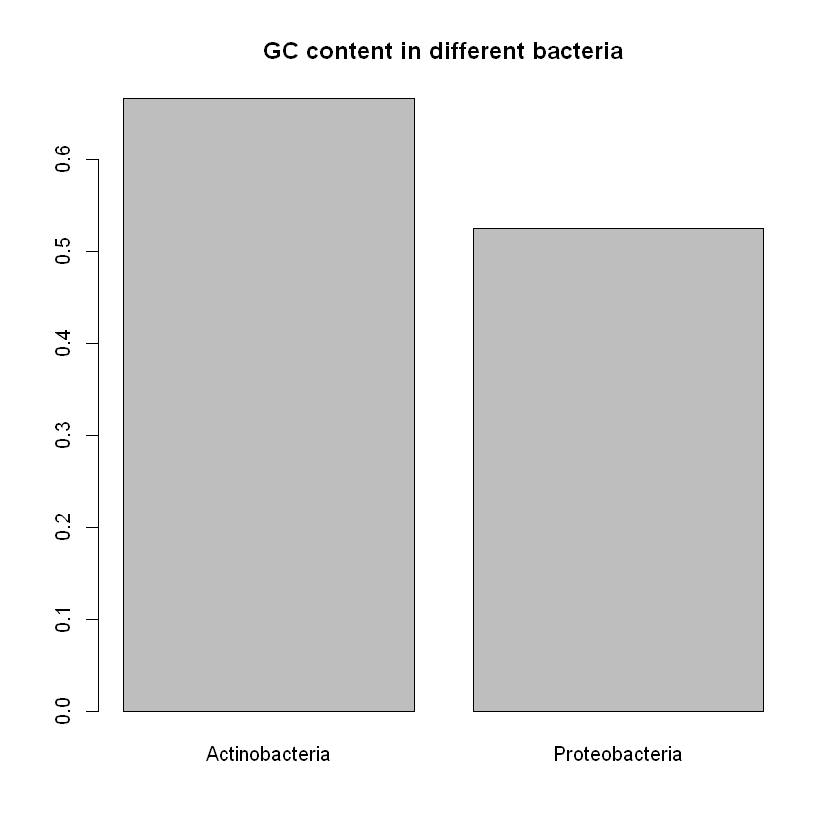

In [70]:
barplot(c(Actinobacteria= GC(myActino),
        Proteobacteria = GC(myProteo)), 
        main="GC content in different bacteria")

In [69]:
seqinr::count(myActino, wordsize=2)


aa ac ag at ca cc cg ct ga gc gg gt ta tc tg tt 
16 30 19 16 27 41 57 14 35 39 49 27  2 29 26  7 

The GC function of `seqinr` uses a similar method, but as an extension, it computes the fraction of `G` and `C` in the nucleotide. We can do this manually using the values of `C (index 2)` and `G (index 3)` as follows:

In [68]:
myGC <- sum(table(myseq)[2], table(myseq)[3])/sum(table(myseq))
myGC

[1] 0.08943089